In [11]:
options(warn=-1)

# Text Mining para Business Analytics (com R)

## Aulas #03 e 04

**Professor: Leandro Krug Wives**

**Assistente: Brenda Salenave Santana**

## Classificação e Agrupamento (clustering) de Textos

## <font color=DarkSlateGrey>Agenda Aula #3 </font>

1. Revisão
2. Classificação de Texto
3. Agrupamento *(clustering)*

# <center><font color=Navy> Revisão </font></center>

- <font color=SlateGray>Bibliotecas</font>

In [12]:
if(!require('tm')) install.packages('tm')
if(!require('gutenbergr')) install.packages('gutenbergr')
if(!require('tokenizers')) install.packages('tokenizers')
if(!require('stopwords')) install.packages('stopwords')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('ggplot2')) install.packages('ggplot2')
if(!require('caret')) install.packages('caret')
if(!require('lexiconPT')) install.packages('lexiconPT')
if(!require('janeaustenr')) install.packages('janeaustenr')
if(!require('hrbrthemes')) install.packages('hrbrthemes')
if(!require('proxy')) install.packages('proxy')
if(!require('fpc')) install.packages('fpc')

In [13]:
library(tm)
library(stopwords)
library(tokenizers)
library(wordcloud)
library(dplyr)
library(tidytext)
library(ggplot2)
library(caret)
library(lexiconPT)
library(gutenbergr)
library(janeaustenr)
library(proxy)
library(fpc)

- <font color=SlateGray>vamos para o RSTudio!</font>

### Exercício 1: 
A biblioteca de tokenização tem várias funções diferentes, que criam toquens de diferentes maneiras, e.g., por caracteres, por n-gramas (i.e., grupos de caracteres ou de palavras), por frases... Analise as diferentes funções para o texto inicial e crie tabelas apresentando os resultados.

In [14]:
texto <- paste0(
  "Este parágrafo corresponde a um exemplo de texto a ser processado por nosso script.\n",
  "Ao invés de informar o texto diretamente, você pode lê-lo de um arquivo ou ainda\n",
  "de um local na Internet. A biblioteca tokenizers tem diferentes opções, é verdade. Teste algumas delas\n",
  "(consulte a página sugerida pelo professor para diferentes opções). #FICAADICA.\n"
)

In [15]:
# toquenização por palavras: separa o texto em tokens
lst_tokens <- tokenize_words(texto)
head(lst_tokens)

# toquenização com hashtags
lst_tokens_with_hashtags <- tokenize_tweets(texto)
head(lst_tokens_with_hashtags)

[[1]]
 [1] "este"        "parágrafo"   "corresponde" "a"           "um"         
 [6] "exemplo"     "de"          "texto"       "a"           "ser"        
[11] "processado"  "por"         "nosso"       "script"      "ao"         
[16] "invés"       "de"          "informar"    "o"           "texto"      
[21] "diretamente" "você"        "pode"        "lê"          "lo"         
[26] "de"          "um"          "arquivo"     "ou"          "ainda"      
[31] "de"          "um"          "local"       "na"          "internet"   
[36] "a"           "biblioteca"  "tokenizers"  "tem"         "diferentes" 
[41] "opções"      "é"           "verdade"     "teste"       "algumas"    
[46] "delas"       "consulte"    "a"           "página"      "sugerida"   
[51] "pelo"        "professor"   "para"        "diferentes"  "opções"     
[56] "ficaadica"

[[1]]
 [1] "este"        "parágrafo"   "corresponde" "a"           "um"         
 [6] "exemplo"     "de"          "texto"       "a"           "ser"        
[11] "processado"  "por"         "nosso"       "script"      "ao"         
[16] "invés"       "de"          "informar"    "o"           "texto"      
[21] "diretamente" "você"        "pode"        "lêlo"        "de"         
[26] "um"          "arquivo"     "ou"          "ainda"       "de"         
[31] "um"          "local"       "na"          "internet"    "a"          
[36] "biblioteca"  "tokenizers"  "tem"         "diferentes"  "opções"     
[41] "é"           "verdade"     "teste"       "algumas"     "delas"      
[46] "consulte"    "a"           "página"      "sugerida"    "pelo"       
[51] "professor"   "para"        "diferentes"  "opções"      "#FICAADICA"

In [16]:
# toquenização por sentenças
lst_sentences <- tokenize_sentences(texto)
head(lst_sentences)

# toquenização por parágrafos
lst_par <- tokenize_paragraphs(texto)
head(lst_par)

[[1]]
[1] "Este parágrafo corresponde a um exemplo de texto a ser processado por nosso script."                      
[2] "Ao invés de informar o texto diretamente, você pode lê-lo de um arquivo ou ainda de um local na Internet."
[3] "A biblioteca tokenizers tem diferentes opções, é verdade."                                                
[4] "Teste algumas delas (consulte a página sugerida pelo professor para diferentes opções)."                  
[5] "#FICAADICA."

[[1]]
[1] "Este parágrafo corresponde a um exemplo de texto a ser processado por nosso script. Ao invés de informar o texto diretamente, você pode lê-lo de um arquivo ou ainda de um local na Internet. A biblioteca tokenizers tem diferentes opções, é verdade. Teste algumas delas (consulte a página sugerida pelo professor para diferentes opções). #FICAADICA. "

In [17]:
# toquenização por gramas
lst_ngrams_1 <- tokenize_ngrams(texto, n = 3)
head(lst_ngrams_1)

lst_ngrams_2 <- tokenize_skip_ngrams(texto, n = 3)
head(lst_ngrams_2)

lst_ngrams_3 <- tokenize_ngrams(texto, n = 3, n_min = 1)
head(lst_ngrams_3)

[[1]]
 [1] "este parágrafo corresponde"  "parágrafo corresponde a"    
 [3] "corresponde a um"            "a um exemplo"               
 [5] "um exemplo de"               "exemplo de texto"           
 [7] "de texto a"                  "texto a ser"                
 [9] "a ser processado"            "ser processado por"         
[11] "processado por nosso"        "por nosso script"           
[13] "nosso script ao"             "script ao invés"            
[15] "ao invés de"                 "invés de informar"          
[17] "de informar o"               "informar o texto"           
[19] "o texto diretamente"         "texto diretamente você"     
[21] "diretamente você pode"       "você pode lê"               
[23] "pode lê lo"                  "lê lo de"                   
[25] "lo de um"                    "de um arquivo"              
[27] "um arquivo ou"               "arquivo ou ainda"           
[29] "ou ainda de"                 "ainda de um"                
[31] "de um local"                 "um local na"                
[33] "local na internet"           "na internet a"              
[35] "internet a biblioteca"       "a biblioteca tokenizers"    
[37] "biblioteca tokenizers tem"   "tokenizers tem diferentes"  
[39] "tem diferentes opções"       "diferentes opções é"        
[41] "opções é verdade"            "é verdade teste"            
[43] "verdade teste algumas"       "teste algumas delas"        
[45] "algumas delas consulte"      "delas consulte a"           
[47] "consulte a página"           "a página sugerida"          
[49] "página sugerida pelo"        "sugerida pelo professor"    
[51] "pelo professor para"         "professor para diferentes"  
[53] "para diferentes opções"      "diferentes opções ficaadica"

[[1]]
  [1] "este"                             "este parágrafo"                  
  [3] "este corresponde"                 "este parágrafo corresponde"      
  [5] "este parágrafo a"                 "este corresponde a"              
  [7] "este corresponde um"              "parágrafo"                       
  [9] "parágrafo corresponde"            "parágrafo a"                     
 [11] "parágrafo corresponde a"          "parágrafo corresponde um"        
 [13] "parágrafo a um"                   "parágrafo a exemplo"             
 [15] "corresponde"                      "corresponde a"                   
 [17] "corresponde um"                   "corresponde a um"                
 [19] "corresponde a exemplo"            "corresponde um exemplo"          
 [21] "corresponde um de"                "a"                               
 [23] "a um"                             "a exemplo"                       
 [25] "a um exemplo"                     "a um de"                         
 [27] "a exemplo de"                     "a exemplo texto"                 
 [29] "um"                               "um exemplo"                      
 [31] "um de"                            "um exemplo de"                   
 [33] "um exemplo texto"                 "um de texto"                     
 [35] "um de a"                          "exemplo"                         
 [37] "exemplo de"                       "exemplo texto"                   
 [39] "exemplo de texto"                 "exemplo de a"                    
 [41] "exemplo texto a"                  "exemplo texto ser"               
 [43] "de"                               "de texto"                        
 [45] "de a"                             "de texto a"                      
 [47] "de texto ser"                     "de a ser"                        
 [49] "de a processado"                  "texto"                           
 [51] "texto a"                          "texto ser"                       
 [53] "texto a ser"                      "texto a processado"              
 [55] "texto ser processado"             "texto ser por"                   
 [57] "a"                                "a ser"                           
 [59] "a processado"                     "a ser processado"                
 [61] "a ser por"                        "a processado por"                
 [63] "a processado nosso"               "ser"                             
 [65] "ser processado"                   "ser por"                         
 [67] "ser processado por"               "ser processado nosso"            
 [69] "ser por nosso"                    "ser por script"                  
 [71] "processado"                       "processado por"                  
 [73] "processado nosso"                 "processado por nosso"            
 [75] "processado por script"            "processado nosso script"         
 [77] "processado nosso ao"              "por"                             
 [79] "por nosso"                        "por script"                      
 [81] "por nosso script"                 "por nosso ao"                    
 [83] "por script ao"                    "por script invés"                
 [85] "nosso"                            "nosso script"                    
 [87] "nosso ao"                         "nosso script ao"                 
 [89] "nosso script invés"               "nosso ao invés"                  
 [91] "nosso ao de"                      "script"                          
 [93] "script ao"                        "script invés"                    
 [95] "script ao invés"                  "script ao de"                    
 [97] "script invés de"                  "script invés informar"           
 [99] "ao"                               "ao invés"                        
[101] "ao de"                            "ao invés de"                     
[103] "ao invés informar"                "ao de informar"                  
[105] "ao de o"                          "

[[1]]
  [1] "este"                        "este parágrafo"             
  [3] "este parágrafo corresponde"  "parágrafo"                  
  [5] "parágrafo corresponde"       "parágrafo corresponde a"    
  [7] "corresponde"                 "corresponde a"              
  [9] "corresponde a um"            "a"                          
 [11] "a um"                        "a um exemplo"               
 [13] "um"                          "um exemplo"                 
 [15] "um exemplo de"               "exemplo"                    
 [17] "exemplo de"                  "exemplo de texto"           
 [19] "de"                          "de texto"                   
 [21] "de texto a"                  "texto"                      
 [23] "texto a"                     "texto a ser"                
 [25] "a"                           "a ser"                      
 [27] "a ser processado"            "ser"                        
 [29] "ser processado"              "ser processado por"         
 [31] "processado"                  "processado por"             
 [33] "processado por nosso"        "por"                        
 [35] "por nosso"                   "por nosso script"           
 [37] "nosso"                       "nosso script"               
 [39] "nosso script ao"             "script"                     
 [41] "script ao"                   "script ao invés"            
 [43] "ao"                          "ao invés"                   
 [45] "ao invés de"                 "invés"                      
 [47] "invés de"                    "invés de informar"          
 [49] "de"                          "de informar"                
 [51] "de informar o"               "informar"                   
 [53] "informar o"                  "informar o texto"           
 [55] "o"                           "o texto"                    
 [57] "o texto diretamente"         "texto"                      
 [59] "texto diretamente"           "texto diretamente você"     
 [61] "diretamente"                 "diretamente você"           
 [63] "diretamente você pode"       "você"                       
 [65] "você pode"                   "você pode lê"               
 [67] "pode"                        "pode lê"                    
 [69] "pode lê lo"                  "lê"                         
 [71] "lê lo"                       "lê lo de"                   
 [73] "lo"                          "lo de"                      
 [75] "lo de um"                    "de"                         
 [77] "de um"                       "de um arquivo"              
 [79] "um"                          "um arquivo"                 
 [81] "um arquivo ou"               "arquivo"                    
 [83] "arquivo ou"                  "arquivo ou ainda"           
 [85] "ou"                          "ou ainda"                   
 [87] "ou ainda de"                 "ainda"                      
 [89] "ainda de"                    "ainda de um"                
 [91] "de"                          "de um"                      
 [93] "de um local"                 "um"                         
 [95] "um local"                    "um local na"                
 [97] "local"                       "local na"                   
 [99] "local na internet"           "na"                         
[101] "na internet"                 "na internet a"              
[103] "internet"                    "internet a"                 
[105] "internet a biblioteca"       "a"                          
[107] "a biblioteca"                "a biblioteca tokenizers"    
[109] "biblioteca"                  "biblioteca tokenizers"      
[111] "biblioteca tokenizers tem"   "tokenizers"                 
[113] "tokenizers tem"              "tokenizers tem diferentes"  
[115] "tem"                         "tem diferentes"             
[117] "tem diferentes opções"       "diferentes"                 
[119] "diferentes opções"           "diferentes opções é"        
[121] "opções"                    

### Exercício 2: 
Mude o texto inicialpara um seu, maior. Se possível, carregue de um arquivo. Crie um Tibble que represente suas palavras (tokens), respectivas frequências (total de palavras, $n$ e $tf$) e stems. Ao invés de remover as stopwords, crie uma coluna extra que indique se cada uma delas é ou não stopword. Depois, conte e mostre quantas são stopwords ou não.

In [18]:
# Carrega um texto de Machado de Assis, da biblioteca Gutenberg
machado <- gutenberg_download(55752) 

# ajusta texto para formato correto (UTF-8)
machado_utf8 <- machado %>% mutate(text=iconv(text, from = "latin1", to = "UTF-8"))

# A função gutenberg_download retorna um tibble com 2 colunas (id_gutenberg e text), 
# temos que pedir para unnest_tokens pegar a segunda, chamada `text` 
# (que tem o texto)
tokens <- machado_utf8 %>% unnest_tokens(token, text) 

# remove gutenberg_id da tabela
tokens <- select(tokens, -gutenberg_id, token) 

# ordena tokens por ocorrências (n)
tokens <- count(tokens, token, sort = TRUE)                                                     

# descobre stems
palavras_texto <- tokens %>%
  mutate(stem = SnowballC::wordStem(token, language = "portuguese"))

#cria lista de stopwords
lst_sw <- c(stopwords("pt"))
lst_sw <- tibble(token = lst_sw)

lst_sw$is_sw <- TRUE 

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [19]:
palavras_texto <- palavras_texto %>% left_join(lst_sw, by='token')

palavras_texto["is_sw"][is.na(palavras_texto["is_sw"])] <- FALSE

#descobre total de palavras (sw e 'normais')
totais <- palavras_texto %>% group_by(is_sw) %>% summarize(total = sum(n))

head(palavras_texto)

print(totais)

`summarise()` ungrouping output (override with `.groups` argument)



token,n,stem,is_sw
<chr>,<int>,<chr>,<lgl>
que,2663,que,TRUE
a,2608,a,TRUE
e,2192,e,TRUE
de,1974,de,TRUE
o,1865,o,TRUE
não,1532,nã,TRUE


# A tibble: 2 x 2
  is_sw total
  <lgl> <int>
1 FALSE 37428
2 TRUE  29866


### Exercício 3: 
Carregue vários textos (mínimo 5) e gere uma tabela semelhante, mas indicando 
 também o tf-idf. Monte um histograma das frequências das palavras. 
 Ordene-o por frequências e verifique se é verdade que as stopwords são mais
 frequentes. Você pode usar alguma biblioteca de textos existentes (como a da 
 Jane Austin, R tem várias prontas, para textos). 

In [20]:
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

# Calcula e insere tf-idf
total_words <- book_words %>%
  group_by(book) %>%
  summarize(total = sum(n))                                                     

book_words <- left_join(book_words, total_words,, by='book')                                

book_tf_idf <- book_words %>% 
  bind_tf_idf(word, book, n)            
  
sw <-stopwords("en")

book_tf_idf$stopword <- ifelse(book_tf_idf$word %in% sw, 'Sim', 'Não')

# Qtde de stopwords x não stopwords
book_tf_idf %>% 
  group_by(stopword) %>% summarise(total=sum(n))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



stopword,total
<chr>,<int>
Não,325084
Sim,399971


In [21]:
# ordenar por qtde de ocorrencias.
book_tf_idf <- book_tf_idf %>% 
  arrange (desc(n))

head(book_tf_idf)

#Exercício: incluir stems

book,word,n,total,tf,idf,tf_idf,stopword
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Mansfield Park,the,6206,160460,0.03867631,0,0,Sim
Mansfield Park,to,5475,160460,0.03412065,0,0,Sim
Mansfield Park,and,5438,160460,0.03389007,0,0,Sim
Emma,to,5239,160996,0.03254118,0,0,Sim
Emma,the,5201,160996,0.03230515,0,0,Sim
Emma,and,4896,160996,0.03041069,0,0,Sim


- <font color=SlateGray>mesmo, mas com documentos da gutenberg</font>

In [22]:
austen <- gutenberg_download(c("105", "141", "158", "21839", "42671", "946", "21839"), meta_fields = "title") 

book_words <- austen %>% 
  select(-gutenberg_id, title, text) %>%
  mutate(book=title, title=NULL) %>%
  unnest_tokens(word, text) %>% 
  count(book, word, sort = TRUE)

total_words <- book_words %>%
  group_by(book) %>%
  summarize(total = sum(n))                                                     

book_words <- left_join(book_words, total_words, by='book')                                

book_tf_idf <- book_words %>% bind_tf_idf(word, book, n)                                                    

sw <-stopwords("en")

book_tf_idf$stopword <- ifelse(book_tf_idf$word %in% sw, 'Sim', 'Não')

`summarise()` ungrouping output (override with `.groups` argument)



In [23]:
# Qtde de stopwords x não stopwords
book_tf_idf %>% group_by(stopword) %>% summarise(total=sum(n))

`summarise()` ungrouping output (override with `.groups` argument)



stopword,total
<chr>,<int>
Não,302526
Sim,371449


In [24]:
# ordenar por qtde de ocorrencias.
book_tf_idf <- book_tf_idf %>% arrange (desc(n))

head(book_tf_idf)

book,word,n,total,tf,idf,tf_idf,stopword
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Mansfield Park,the,6206,160460,0.03867631,0,0,Sim
Mansfield Park,to,5475,160460,0.03412065,0,0,Sim
Mansfield Park,and,5438,160460,0.03389007,0,0,Sim
Emma,to,5239,160996,0.03254118,0,0,Sim
Emma,the,5201,160996,0.03230515,0,0,Sim
Emma,and,4896,160996,0.03041069,0,0,Sim


### Exercício 4: 
A frequência dos termos em um corpus (i.e., conjunto de documentos) obedece a
 Lei de Zipf (https://en.wikipedia.org/wiki/Zipf%27s_law). Procure demonstrar 
 tal Lei, criando um gráfico de dispersão onde em x aparecem as frequencias 
 médias de termos (tf médio) e em y aparece a quantidade de documentos
 (ou o idf). Se for muito complicado, eventualmente use um histograma ou outro
 tipo de gráfico que ilustre o efeito...

In [25]:
# A lei de Zipf’s afirma que a frequencia das palavras é inversamente proporcional ao seu ranque.

library(ggplot2)
library(hrbrthemes)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



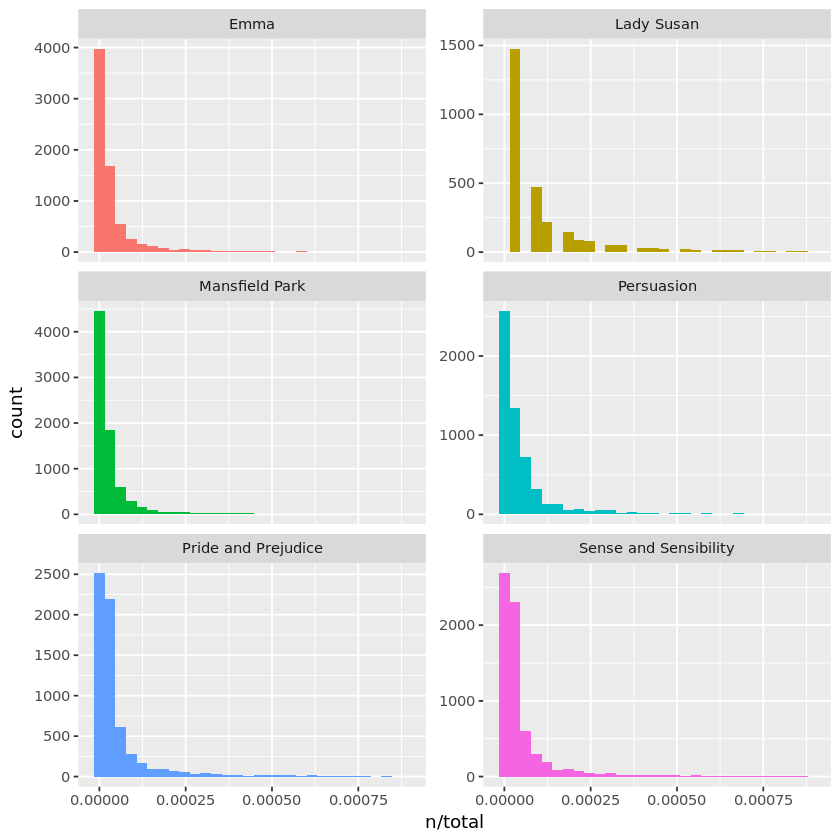

In [26]:
ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

`summarise()` ungrouping output (override with `.groups` argument)



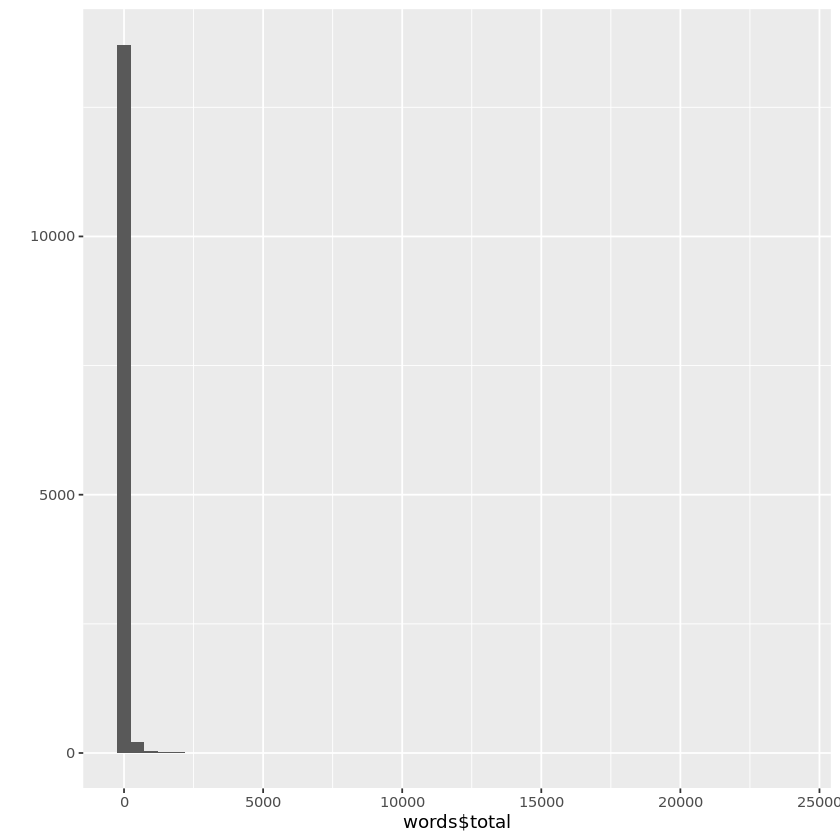

In [27]:
words <- book_tf_idf %>% 
  select(word, n) %>% 
  group_by(word) %>% 
  summarise(total=sum(n)) %>%
  arrange(desc(total)) 

max = summarise(words, sum(total))

qplot(words$total, geom="histogram", bins=50)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



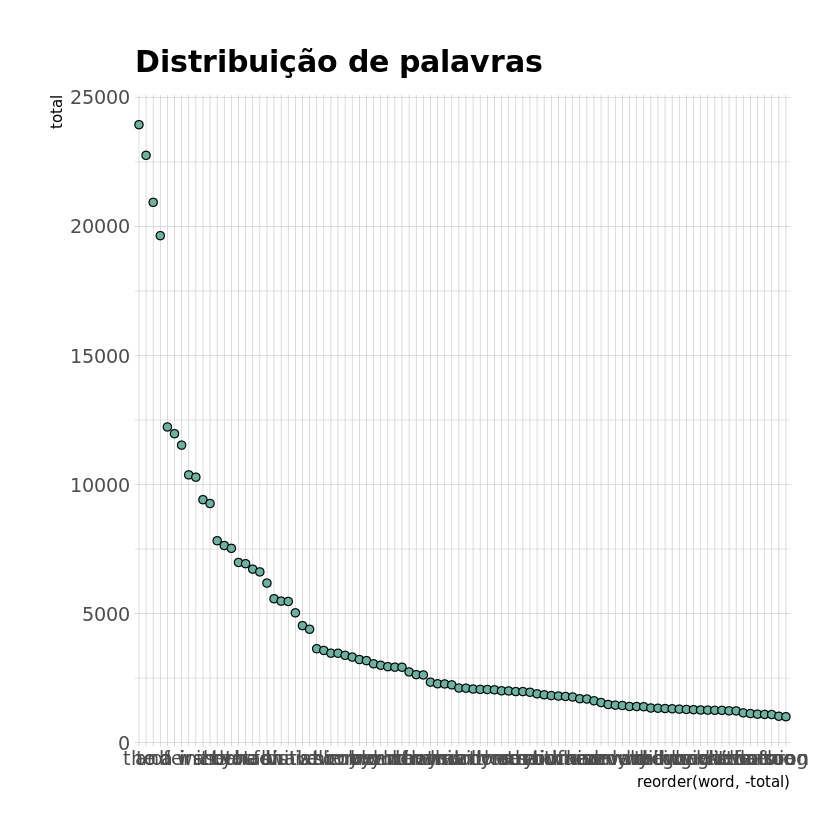

In [28]:
words %>% 
  filter(total>1000) %>%
  ggplot(aes(x=reorder(word, -total), y=total)) +
  geom_line() + 
  geom_point(shape=21, color="black", fill="#69b3a2", size=2) +
  ggtitle("Distribuição de palavras") + 
  theme_ipsum()

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = c("book", "total")



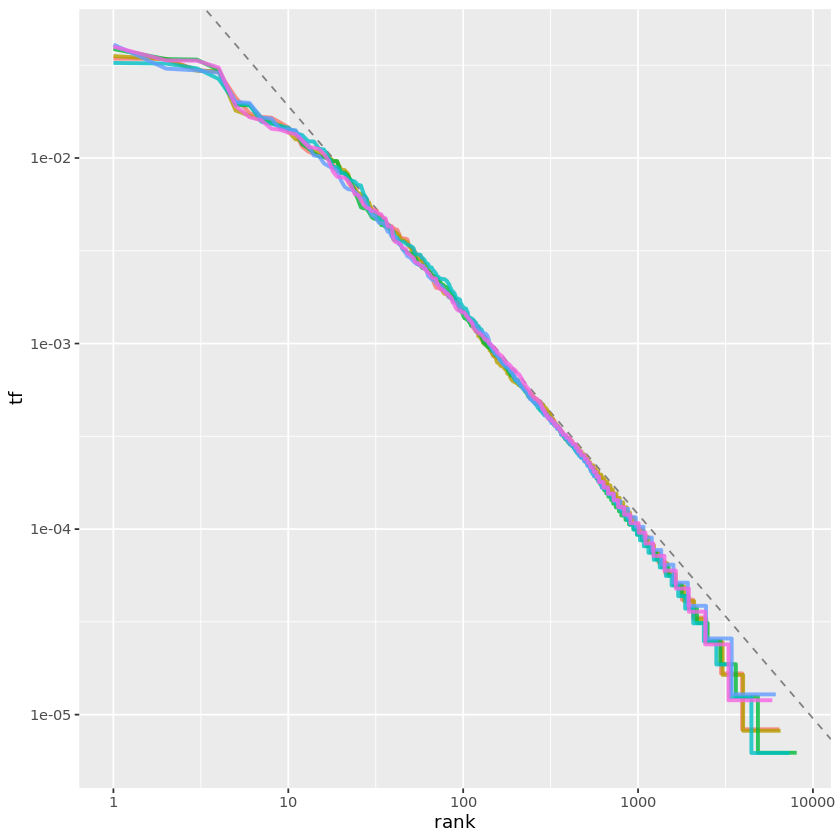

In [63]:
total_words <- book_words %>% group_by(book) %>% summarize(total = sum(n))

book_words <- left_join(book_words, total_words)

freq_by_rank <- book_words %>% group_by(book) %>% mutate(rank = row_number(), `tf` = n/total) %>% ungroup()

freq_by_rank %>% ggplot(aes(rank, `tf`, color = book)) + 
  geom_abline(intercept = -0.62, slope = -1.1, color = "gray50", linetype = 2) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() + scale_y_log10()

  # Mais detalhes em: https://www.tidytextmining.com/tfidf.html

# <center><font color=Navy> Classificação </font></center>

## <font color=MidnightBlue> Classificação </font>

Associa documentos a classes pré-definidas, a partir de características textuais, como palavras.

### Aplicações: 
- identificação tópicos, assuntos ou temas
- roteamento de mensagens/documentos, detecção de SPAM
- detecção de polaridade, sentimentos

<img src="https://miro.medium.com/max/2554/1*Fm58r_RQ53sEHfwFa28LpA.png" width="290" height="290" />

**<font color=OrangeRed>*</font>**_É necessário conhecer a priori as classes ou suas propriedades!_

### Abordagens
- Engenharia de Conhecimento (regras heurísticas)
- Algoritmos Supervisionados de Aprendizagem de Máquina

# <center><font color=SteelBlue> Dúvidas? </font></center>

# <center><font color=Navy> Agrupamento </font></center>

## <font color=MidnightBlue> Agrupamento </font>

- procura identificar subtipos ou grupos que não foram definidos a priori
- organiza dados não etiquetados em grupos similares, chamados de clusters
- é um tipo de análise exploratória de dados

<img src="https://miro.medium.com/max/700/1*YWEqFeKKKzDiNWy5UfrTsg.png" width="300" height="300" />


### Aplicações
- Visão do todo e das relações 
- Identificação de padrões, características comuns, o assunto de um conjunto de textos
- Detecção de outliers 

### Abordagens
- Envolve o uso de técnicas não-supervisionadas 
    - partitivo
    - hierárquico

# <center><font color=Navy> Processo / Etapas </font></center>

## Processo / Etapas
Em ambos (classificação ou clusterização) precisamos realizar as etapas já discutidas (carga, limpeza, seleção de palavras...) e organizar os dados (palavras dos documentos) em uma estrutura adequada para o processamento.

### Esquema de Representação
Na última aula vimos como gerar uma matriz de tf-idf de palavras:

In [30]:
book_words <- austen_books() %>% unnest_tokens(word, text) %>% count(book, word, sort = TRUE)

total_words <- book_words %>% group_by(book) %>% summarize(total = sum(n))                                                     

book_words <- left_join(book_words, total_words)                                

book_tf_idf <- book_words %>% bind_tf_idf(word, book, n) %>% select(-total)            

head(book_tf_idf  %>% arrange(desc(tf_idf)))

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "book"



book,word,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Sense & Sensibility,elinor,623,0.005193528,1.791759,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.791759,0.007348847
Mansfield Park,crawford,493,0.003072417,1.791759,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.791759,0.005468939
Persuasion,elliot,254,0.003036171,1.791759,0.005440088
Emma,emma,786,0.004882109,1.098612,0.005363545


### Esquema de Representação
- O problema é que as palavras podem aparecer em mais de um livro!

In [31]:
# Perceba que as palavras podem aparecer em mais de um livro...
head(book_tf_idf %>% group_by(word,book) %>% summarize(total=sum(n)) %>% arrange(desc(total)))

`summarise()` regrouping output by 'word' (override with `.groups` argument)



word,book,total
<chr>,<fct>,<int>
the,Mansfield Park,6206
to,Mansfield Park,5475
and,Mansfield Park,5438
to,Emma,5239
the,Emma,5201
and,Emma,4896


### Esquema de Representação

Precisamos de esquemas de representação mais adequados e representativos:
- para a coleção de documentos, usar VCorpus, que oferece metadados sobre os documentos
- para as informções de palavras por documentos, usar matriz termo-documento

#### VCorpus

Em linguística, *Corpus* (do Latin) é um conjunto de textos utilizado como base de análise. Seu plural é *Corpora*.

A estrutura VCorpus oferece uma série de funções interessantes.

Detalhes em https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf.

In [32]:
# definição / carga do corpus
docs <- c("Texto de um  documento (documento com id 01).",                      # define alguns documentos e coloca em um vetor        
   "Texto de    outro documento (documento com id 02).", 
   "Terceiro documento  e seu texto (documento com id 03).")

corpus = VCorpus(VectorSource(docs), list(language="pt"))                       # cria uma estrutura de dados que representa o corpus em memória (VCorpus) 

inspect(corpus)                                                                 # devolve informações gerais sobre a estrutura e seus documentos

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 45

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 50

[[3]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 54



In [33]:
# meta(corpus[[1]])                                                             # devolve os metadados do primeiro documento

# corpus[[1]]$content                                                           # seu conteúdo

# for (i in 1:length(corpus)) {                                                 # mostra todos os documentos
#   print(corpus[[i]]$content)
# }

In [34]:
# preprocessamento
corpus = tm_map(corpus, content_transformer(tolower))                           # transforma tudo para minúsculas
corpus = tm_map(corpus, removeNumbers)                                          # remove números
corpus = tm_map(corpus, removePunctuation)                                      # remove pontuação
corpus = tm_map(corpus, removeWords, stopwords("pt"))                           # remove stopwords
# corpus = tm_map(corpus, stemDocument, language="portuguese")                  # aplica stemming (para português, não funciona - há um bug reconhecido na versão atual da biblioteca - sugere-se usar a biblioteca alternativa 'quantenda', ao invés da 'tm' - procure no Google e tente utilizá-la, como desafio)                                                                                
corpus = tm_map(corpus, stripWhitespace)                                        # remove espaços extras e tabulações

for (i in 1:length(corpus)) {                                                 
  print(corpus[[i]]$content)
}

[1] "texto documento documento id "
[1] "texto outro documento documento id "
[1] "terceiro documento texto documento id "


#### DocumentTermMatrix

A estrutura $Termo-Documento$ representa as palavras identificadas em um *corpus* e indica os respectivos documentos em que aparecem.

Ela também oferece uma série de funções interessantes...

Maiores detalhes podem ser obtidos em https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf.

In [35]:
dtm <- DocumentTermMatrix(corpus)                                               # cria uma matriz de termos vs documentos (por padrão, usa número absoluto de ocorrrências e remove palavras com menos de 3 caracteres)
inspect(dtm)                                                                    # mostra a matriz 

<<DocumentTermMatrix (documents: 3, terms: 4)>>
Non-/sparse entries: 8/4
Sparsity           : 33%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs documento outro terceiro texto
   1         2     0        0     1
   2         2     1        0     1
   3         2     0        1     1


In [36]:
dtm <- DocumentTermMatrix(corpus, control = list(wordLengths = c(1,Inf)))       # inclui palavras de qualquer tamanho                                         
inspect(dtm)                                                 

#dtm <- DocumentTermMatrix(corpus, control = list(wordLengths=c(1,Inf), bounds = list(global = c(2,Inf)))) # limita frequencia das palavras (mínima, máxima) a incluir
#inspect(dtm)                                                 

<<DocumentTermMatrix (documents: 3, terms: 5)>>
Non-/sparse entries: 11/4
Sparsity           : 27%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs documento id outro terceiro texto
   1         2  1     0        0     1
   2         2  1     1        0     1
   3         2  1     0        1     1


In [37]:
# findFreqTerms(dtm, 2)                                                         # recupera os termos com frequencia >= 2

In [38]:
# cria matriz considerando tf-idf ao invés de tf tradicional
tfidf_dtm <- DocumentTermMatrix(corpus, 
                                control = list(weighting = weightTfIdf,         
                                               wordLengths = c(1,Inf)))
inspect(tfidf_dtm)

<<DocumentTermMatrix (documents: 3, terms: 5)>>
Non-/sparse entries: 2/13
Sparsity           : 87%
Maximal term length: 9
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
    Terms
Docs documento id     outro  terceiro texto
   1         0  0 0.0000000 0.0000000     0
   2         0  0 0.3169925 0.0000000     0
   3         0  0 0.0000000 0.3169925     0


In [39]:
# tfidf_dtm = removeSparseTerms(tfidf_dtm, 0.9)                                 # remove termos com esparsividade menor do que o valor passado
# inspect(tfidf_dtm)

### Juntando tudo...

- <font color=SlateGray>Bibliotecas</font>

In [40]:
if(!require('tm')) install.packages('tm')
if(!require('gutenbergr')) install.packages('gutenbergr')
if(!require('tokenizers')) install.packages('tokenizers')
if(!require('stopwords')) install.packages('stopwords')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('dplyr')) install.packages('dplyr')

In [41]:
library(tm)
library(stopwords)
library(gutenbergr)
library(tokenizers)
library(wordcloud)
library(dplyr)

In [42]:
# Carrega textos de Machado de Assis da biblioteca Gutenberg
machado <- gutenberg_download(c(55752, 56737, 54829, 55682)) 

# Ajusta caracteres para UTF-8
machado$text <- machado$text %>% iconv("latin1", "UTF-8")

corpus = VCorpus(VectorSource(machado)) # TODO: verificar porque cria só 2 documentos!   
# corpus

# preprocessamento 
tdm <- DocumentTermMatrix(corpus, 
  control = list(
    removePunctuation = TRUE, 
    stopwords = c(stopwords('portuguese'), 'elle', 'ella', 'capitulo', 'ainda', 'tambem'), 
    removeNumbers = TRUE,
    content_transformer = tolower,
    content_transformer = stripWhitespace
  ))

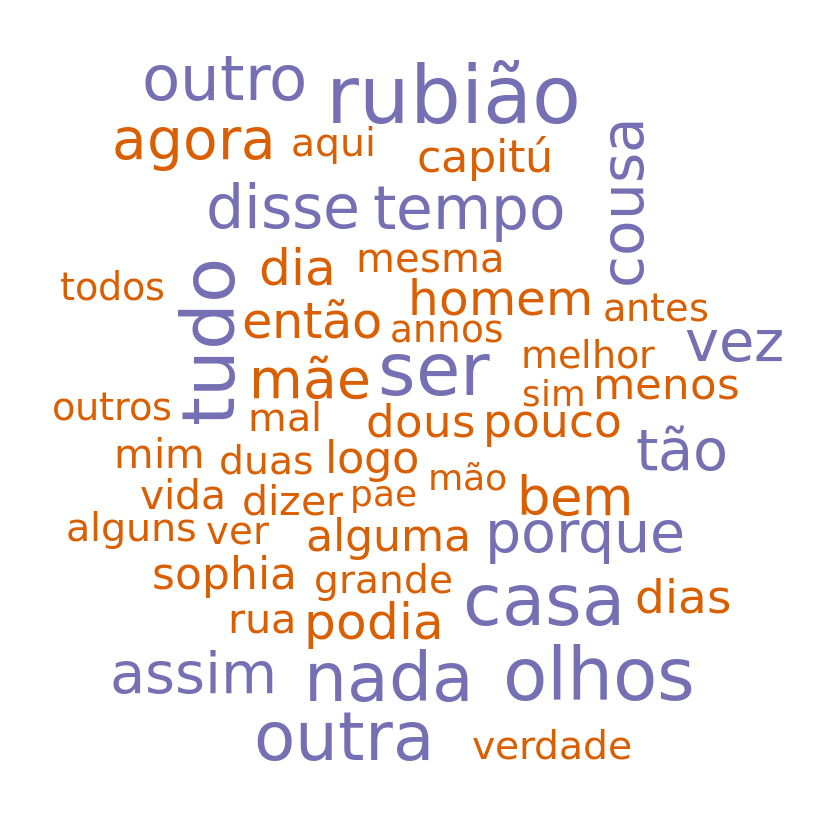

In [43]:
# cria núvem de palavras
freq = data.frame(sort(colSums(as.matrix(tdm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=50, colors=brewer.pal(1, "Dark2"))

## Exemplo de Classificação (usando heurísticas)

### Aplicação: detecção de polaridade

Objetivo: analisar palavras com polaridade negativa, neutra ou positiva

In [44]:
# Carrega e prepara dicionário de polaridades em lingua portuguesa
# detalhes em https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/
data("oplexicon_v3.0")
op30 <- oplexicon_v3.0
colnames(op30) <- c("word", "tipo", "sentimento", "revisão")            # palavra, tipo (classe gramatical), polaridade (-1: negativa, 0: neutra, 1: positiva), atribuição (A)utomática ou (M)anual)

# recupera palavras dos textos de Machado de Assis (Carregados na célula "Juntando tudo...")
palavras <- tibble::rownames_to_column(freq, "word") %>% 
  rename(palavra = "sort.colSums.as.matrix.tdm....decreasing...TRUE.") %>%
  as_tibble()

#palavras

# Identifica a polaridade das palavras (e sua classe gramatical)
polaridade <- palavras %>%
  inner_join(op30, by='word')

head(polaridade, 10)

word,palavra,tipo,sentimento,revisão
<chr>,<dbl>,<chr>,<int>,<chr>
ser,618,vb,1,A
nada,575,adj,0,A
pouco,352,adj,-1,A
dizer,310,vb,0,A
mesma,298,adj,0,M
grande,289,adj,0,M
ver,286,vb,1,A
melhor,279,adj,1,M
amigo,231,adj,1,A


In [45]:
tidy_machado <- machado %>%
  unnest_tokens(word, text)
  
count <- tidy_machado %>%
          count(word, sort = TRUE)

In [46]:
bing_word_counts <- tidy_machado %>%
  inner_join(op30, by='word') %>%
  count(word, sentimento, sort = TRUE) %>%
  ungroup()
head(bing_word_counts, n=5)

word,sentimento,n
<chr>,<int>,<int>
mas,-1,2236
por,0,1405
ser,1,621
nada,0,581
mesmo,0,426


Selecting by n



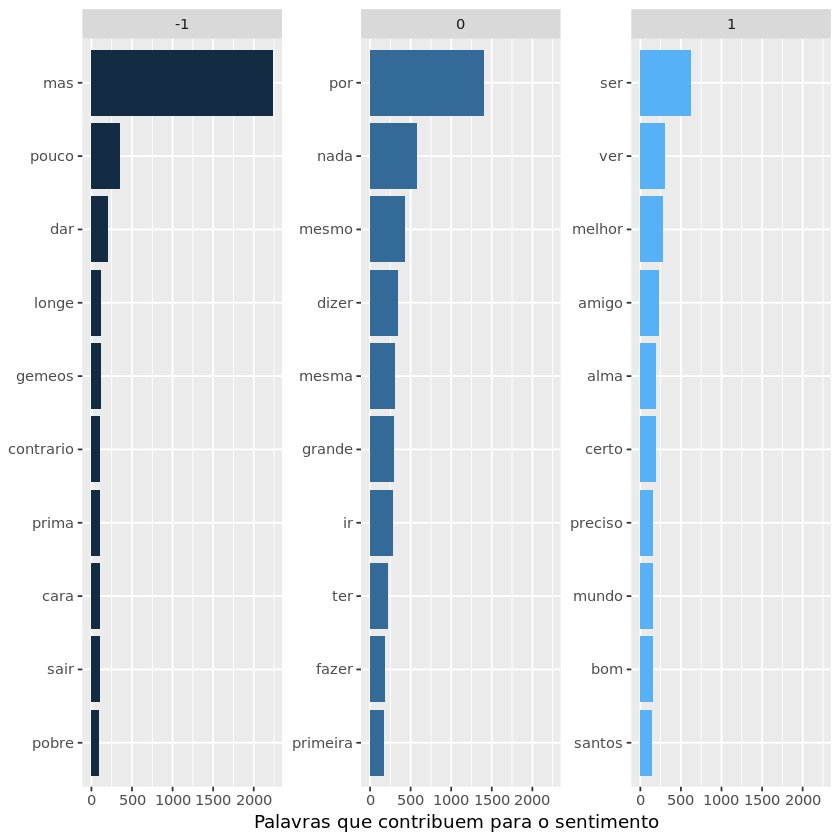

In [47]:
bing_word_counts %>%
  group_by(sentimento) %>% top_n(10) %>% ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentimento)) + geom_col(show.legend = FALSE) +
  facet_wrap(~sentimento, scales = "free_y") +
  labs(y = "Palavras que contribuem para o sentimento", x = NULL) + coord_flip()

## Exemplo de Classificação (usando aprendizado de máquina supervisionado)

Objetivo: detectar a categoria ou assunto de um documento

---



- <font color=SlateGray>Bibliotecas</font>

In [48]:
if(!require('caret')) install.packages('caret')
if(!require('arm')) install.packages('arm')
if(!require('tm')) install.packages('tm')
if(!require('tidytext')) install.packages('tidytext')
if(!require('e1071')) install.packages('e1071')

library(tm)
library(tidytext)
library(caret)                                                                  # oferece um conjunto de funções para auxiliar o processo de criação de modelos preditivos.
library(arm)
library(e1071)

Loading required package: arm

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix

Loading required package: lme4


arm (Version 1.11-2, built: 2020-7-27)


Working directory is /home/wives


Loading required package: e1071



- <font color=SlateGray> Dados de Treino</font>

In [49]:
data <- c('bom', 'ruim')
corpus <- VCorpus(VectorSource(data))

- <font color=SlateGray> Cria matriz de termos por documentos </font>

In [50]:
tdm <- DocumentTermMatrix(corpus, list(removePunctuation = TRUE, stopwords = stopwords('portuguese'), stemming = TRUE, removeNumbers = TRUE))
tdm

<<DocumentTermMatrix (documents: 2, terms: 2)>>
Non-/sparse entries: 2/2
Sparsity           : 50%
Maximal term length: 4
Weighting          : term frequency (tf)

- <font color=SlateGray> Converte em um data.frame para treinamento e atribui uma classificação (fator) a cada documento. </font>

In [51]:
train <- as.matrix(tdm)
train <- cbind(train, c(0, 1))
colnames(train)[ncol(train)] <- 'y'
train <- as.data.frame(train)
train$y <- as.factor(train$y)
train

,bom,ruim,y
,<dbl>,<dbl>,<fct>
1,1,0,0
2,0,1,1


- <font color=SlateGray> Treino </font>

In [52]:
fit <- train(y ~ ., data = train, method = 'bayesglm')

- <font color=SlateGray> Verifica acurácia no treino </font>

In [53]:
predict(fit, newdata = train, type='prob')

,0,1
,<dbl>,<dbl>
1,0.7913193,0.2086807
2,0.2086807,0.7913193


- <font color=SlateGray> Dados de Teste </font>

In [54]:
data2 <- c('Bom? Ruim! Muito Ruim!!')
corpus <- VCorpus(VectorSource(data2))
tdm <- DocumentTermMatrix(corpus, control = list(dictionary = Terms(tdm), removePunctuation = TRUE, stopwords = stopwords('portuguese'), removeNumbers = TRUE))
test <- as.matrix(tdm)
test

,bom,ruim
1,1,2


- <font color=SlateGray>Verifica acurácia no teste</font>

In [55]:
predict(fit, newdata = test)
predict(fit, newdata = test, type='prob')

[1] 1
Levels: 0 1

,0,1
,<dbl>,<dbl>
1,0.2086807,0.7913193


## Exemplo de clustering 


In [57]:
# Leitura dos dados (de arquivos locais)
# (os originais estão em https://github.com/brendasalenave/text-mining-R/tree/master/datasets, caso queira baixar em sua máquina)
path = "./datasets"                                                   # pasta onde os arquivos TXT se encontram
dir = DirSource(paste(path,"/filmes/",sep=""), encoding = "UTF-8")    # tem outra pasta dentro? precisa?
corpus = Corpus(dir)
summary(corpus)

                       Length Class             Mode
A Era do Gelo          2      PlainTextDocument list
A Era do Gelo 2        2      PlainTextDocument list
A Era do Gelo 3        2      PlainTextDocument list
Meu Malvado Favorito   2      PlainTextDocument list
Meu Malvado Favorito 2 2      PlainTextDocument list
Minions                2      PlainTextDocument list
Mulan                  2      PlainTextDocument list
Pocahontas             2      PlainTextDocument list
Procurando Dory        2      PlainTextDocument list
Procurando Nemo        2      PlainTextDocument list
Rei Leão               2      PlainTextDocument list
Rei Leão 2             2      PlainTextDocument list
Shrek                  2      PlainTextDocument list
Shrek 2                2      PlainTextDocument list

In [58]:
# cria matriz de termos por documento

ndocs <- length(corpus)

minTermFreq <- ndocs * 0.01 # ignora palavras extremamente raras, i.e., termos que aparecem em menos de 1% dos documentos
maxTermFreq <- ndocs * .5 # ignora palavras muito comuns, i.e., termos que aparecem em mais de 50% dos documentos
dtm = DocumentTermMatrix(corpus,
                         control = list(
                                        stopwords = TRUE, 
                                        wordLengths=c(4, 15),
                                        removePunctuation = T,
                                        removeNumbers = T,
                                        #stemming = T,
                                        bounds = list(global = c(minTermFreq, maxTermFreq))
                                       ))
write.csv((as.matrix(dtm)), "test.csv") # exemplo de escrita de arquivo csv
dtm.matrix = as.matrix(dtm)

- <font color=SlateGray>Term Frequency–Inverse Document Frequency (TF-IDF)</font>:
  - No DTM percebe-se que os termos que ocorrem com frequência têm um alto valor associado. No entanto, a alta frequência de um determinado termo em um documento significa pouco se esses termos aparecerem com frequência em outros documentos no corpus. Em outras palavras, os termos que ocorrem com freqüência em um documento, mas não com frequência dentro do corpus, recebem uma ponderação mais alta, uma vez que se supõe que essas palavras contenham mais significado em relação ao documento.

  - Para conseguir isso, diminui-se os termos que ocorrem com frequência nos documentos. Isso é feito calculando as estatísticas do tf-idf.

In [59]:
inspect(dtm)

<<DocumentTermMatrix (documents: 14, terms: 2249)>>
Non-/sparse entries: 3319/28167
Sparsity           : 89%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
                        Terms
Docs                     diego dory fiona manny marlin nemo reino scar shrek
  A Era do Gelo             14    0     0    15      0    0     0    0     0
  A Era do Gelo 2            9    0     0    11      0    0     0    0     0
  A Era do Gelo 3            8    0     0    13      0    0     0    0     0
  Meu Malvado Favorito 2     0    0     0     0      0    0     0    0     0
  Mulan                      0    0     0     0      0    0     0    0     0
  Procurando Dory            0   29     0     0     11   13     0    0     0
  Rei Leão                   0    0     0     0      0    0    12   19     0
  Rei Leão 2                 0    0     0     0      0    0     5    6     0
  Shrek                      0    0    17     0      0    0     1    0    21
  Shr

- <font color=SlateGray> Lista dos termos mais importantes para o Rei Leão, conforme determinado usando a ponderação tf-idf </font>

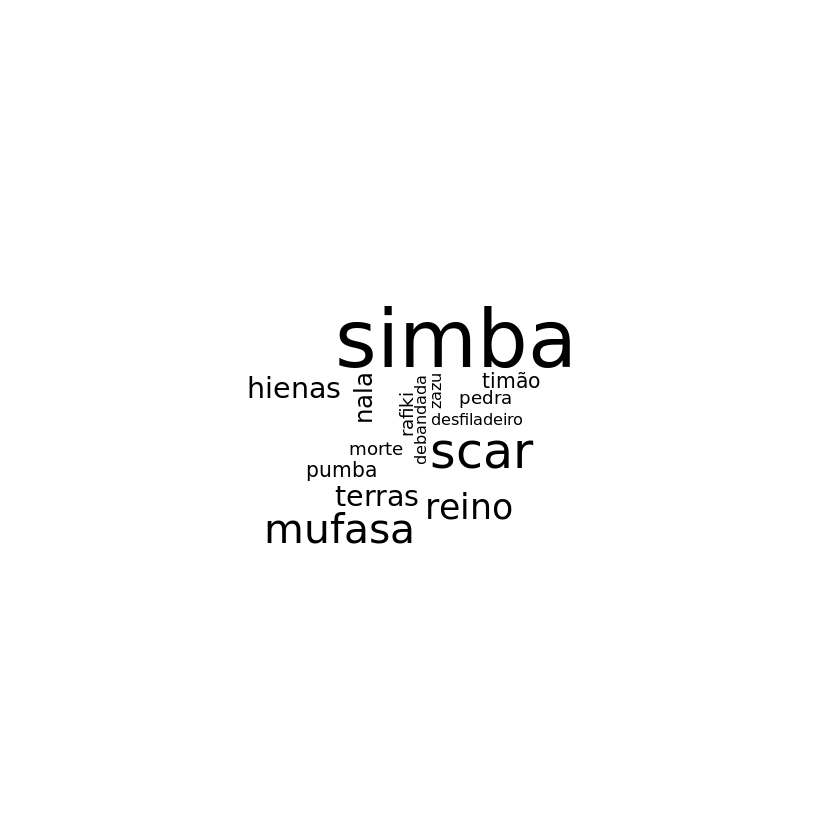

In [60]:
wordcloud(colnames(dtm.matrix), dtm.matrix[11, ], max.words = 20)

### <font color=SlateGrey> Clustering Hierárquico</font>

- Atribuir cada documento ao seu próprio cluster (membro único) encontrando o par de clusters mais próximos entre si (dist) e mesclando-os.
- Cluster menor que antes.

Calcula a distância euclidiana/cosseno entre os documentos. Essa distância é o que o algoritmo de Clustering usa para agrupar documentos.

In [61]:
m  <- as.matrix(dtm)
distMatrix <- dist(m, method="cosine")

- <font color=SlateGray>Método</font>:
  - Calcular as distâncias entre o novo cluster e cada um dos clusters antigos;
  - Repitir as etapas 2 e 3 até que você tenha um único cluster contendo todos os documentos.

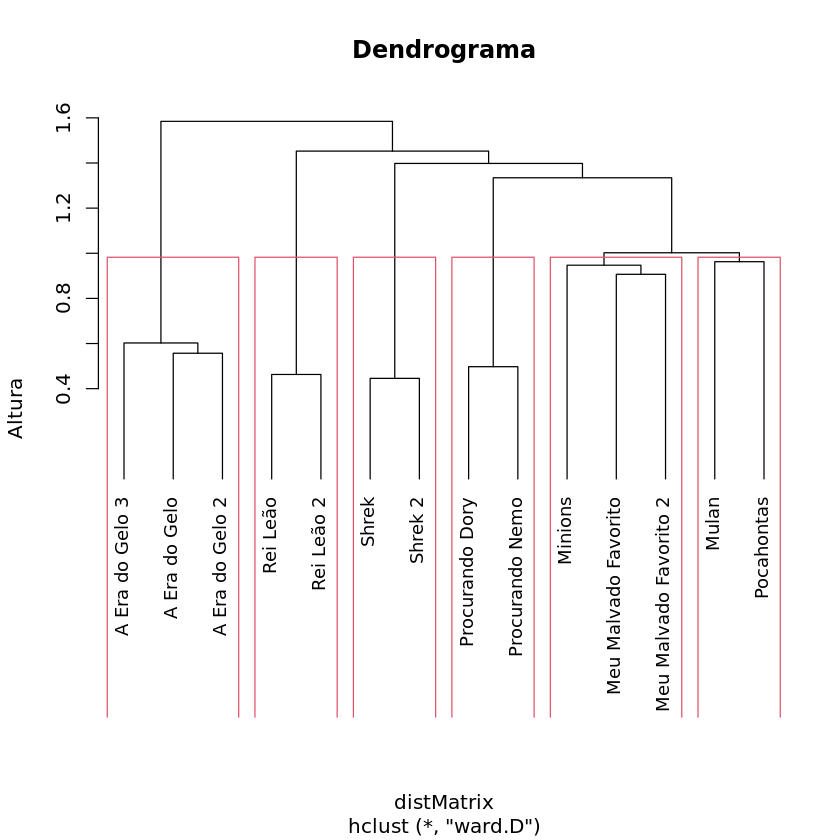

In [62]:
groups <- hclust(distMatrix,method="ward.D")
plot(groups, cex=0.9, hang=-1, main='Dendrograma', ylab='Altura')
rect.hclust(groups, k=6)

# Exercícios
1. **Modifique o código da célula "Juntando tudo..." de maneira a carregar outros documentos**. Na página http://gutenberg.org/ebooks/ você pode consultar outros livros, por autor, título, etc. Monte uma núvem de palavras adequada. Se necessário, adicione palavras à lista de stopwords.
2. **Modifique o código da célula "Exemplo de classificação** (usando heurísticas)" **de maneira a detectar a polaridade de outros textos em português**. Monte uma núvem de palavras negativas vs positivas (em um único gráfico, colocando vermelho para negativas, azul para neutras e verde para positivas) ou em gráficos separados. **Desafio**: conte quantas são positivas e quantas são negativas, por documento.
3. **Leia um dos artigos disponibilizados no item "Material recomendado"** da Segunda Quinzena, no Moodle. Em seguida, **elabore uma resenha do artigo lido**. A resenha deve conter, pelo menos, os seguintes itens: artigo lido, objetivo, o que foi efetivamente feito e como (se possível, identificar e descrever a técnica de mineração de textos utilizada e a ferramenta, se houver), principais resultados, limitações e benefícios. Finalizar com uma análise de como tal abordagem, ferramenta ou técnica poderia ser utilizada no seu dia a dia.